<a href="https://colab.research.google.com/github/Yoav012/IntroToAeroTau/blob/main/Lab_partA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Analytical Solution: The Relationship Between Hill Height, Free Stream Velocity, and Source Strength</h3>

<p>
The flow around an idealized hill is modeled using a combination of a uniform flow and a point source, creating a "semi-infinite Rankine body."  
The surface of the hill is defined by the streamline passing through the stagnation point, where the total velocity equals zero.
</p>

<p>
The stream function for the combination of a source with strength \( m \) and a uniform flow with velocity \( U_{\infty} \) is given by:
</p>

$$
\psi(x, y) = U_{\infty} \cdot y + \frac{m}{2\pi} \cdot \theta
$$

<p>
Where:
</p>

<ul>
<li>\( U_{\infty} \) – Free stream velocity.</li>
<li>\( m \) – Source strength.</li>
<li>\( \theta \) – The polar angle relative to the source center.</li>
</ul>

<p>
The surface of the hill corresponds to the streamline passing through the stagnation point, so:
</p>

$$
\psi_{\text{stagnation}} = 0
$$

<p>
Evaluating the stream function at the point \( x = 0, y = h \) gives the following relation:
</p>

$$
U_{\infty} \cdot h = \frac{m}{2\pi} \cdot \frac{π}{2}
$$

<p>
Therefore, the direct relation between the hill height, the source strength, and the free stream velocity is:
</p>

$$
h = \frac{m}{4⋅ U_{\infty}}
$$

<p>
Or equivalently:
</p>

$$
m = 4 \cdot U_{\infty} \cdot h
$$


<h3>Source Strength Calculation</h3>

<p>
Given:
</p>

<ul>
<li>Free stream velocity: \( U_{\infty} = 20 \, [\frac{m}{s}] \)</li>
<li>Desired hill height: \( h = 40 \, [m] \)</li>
</ul>

<p>
Substituting:
</p>

$$
m = 4\cdot 20 \cdot 40
$$

<p>
Source strength:
</p>

$$
m = 3200 \, [\frac{m^2}{s}]
$$


In [402]:
import math
import numpy as np
from matplotlib import pyplot

In [403]:
N = 100                                # number of points in each direction
x_start, x_end = -200.0, 500.0            # boundaries in the x-direction
y_start, y_end = -200.0, 200.0            # boundaries in the y-direction
x = np.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
y = np.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates

print('x = ', x)
print('y = ', y)

X, Y = np.meshgrid(x, y)              # generates a mesh grid

x =  [-200.         -192.92929293 -185.85858586 -178.78787879 -171.71717172
 -164.64646465 -157.57575758 -150.50505051 -143.43434343 -136.36363636
 -129.29292929 -122.22222222 -115.15151515 -108.08080808 -101.01010101
  -93.93939394  -86.86868687  -79.7979798   -72.72727273  -65.65656566
  -58.58585859  -51.51515152  -44.44444444  -37.37373737  -30.3030303
  -23.23232323  -16.16161616   -9.09090909   -2.02020202    5.05050505
   12.12121212   19.19191919   26.26262626   33.33333333   40.4040404
   47.47474747   54.54545455   61.61616162   68.68686869   75.75757576
   82.82828283   89.8989899    96.96969697  104.04040404  111.11111111
  118.18181818  125.25252525  132.32323232  139.39393939  146.46464646
  153.53535354  160.60606061  167.67676768  174.74747475  181.81818182
  188.88888889  195.95959596  203.03030303  210.1010101   217.17171717
  224.24242424  231.31313131  238.38383838  245.45454545  252.52525253
  259.5959596   266.66666667  273.73737374  280.80808081  287.87878788
  2

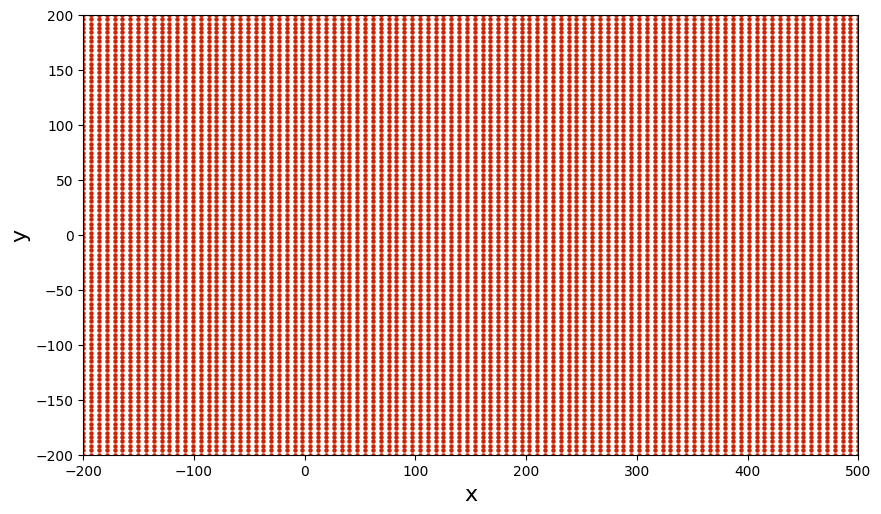

In [404]:
%matplotlib inline

# plot the grid of points
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(X, Y, s=5, color='#CD2305', marker='o')

In [405]:
# Given flow parameters
u_inf = 20.0                # Freestream velocity (m/s)
h = 40.0                    # Desired hill height (m)
m = 4 * u_inf * h # Source strength (m^2/s)

# compute the freestream velocity field
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# compute the stream-function
psi_freestream = u_inf * Y

In [406]:
def get_velocity(strength, xs, ys, X, Y):

    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)

    return u, v

In [407]:
def get_stream_function(strength, xs, ys, X, Y):

    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))

    return psi

In [408]:
strength_source = m            # strength of the source
x_source, y_source = 0.0, 0.0   # location of the source

# compute the velocity field
u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

# compute the stream-function
psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

In [409]:
# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

In [410]:
# Pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

<h3>Analytical Calculation of the Maximum Wind Speed at the Hilltop</h3>

<p>
The point where the maximum wind speed occurs is at the hilltop, meaning at the location where <strong>x = 0</strong> and <strong>y = h</strong>.
</p>

<p>
The general velocity components in the source and uniform flow model are:
</p>

<ul>
Horizontal component (u):
</ul>

$$
u = U_{\infty} + \frac{m}{2\pi} \cdot \frac{x}{x^2 + y^2}
$$

<ul>
Vertical component (v):
</ul>

$$
v = \frac{m}{2\pi} \cdot \frac{y}{x^2 + y^2}
$$

<p>
At the hilltop, for <strong>x = 0</strong> and <strong>y = h</strong>, we get:
</p>

<ul>

$$
u = U_{\infty}
$$

$$
v = \frac{m}{2\pi} \cdot \frac{h}{h^2} = \frac{m}{2\pi h}
$$

</ul>

<p>
Using the relation we previously derived between the source strength and the hill height:
</p>

$$
m = 4 \cdot U_{\infty} \cdot h
$$

<p>
Substituting:
</p>

$$
v = \frac {2\cdot U_{\infty}}{\pi}
$$

<p>
Therefore:
</p>

<ul>

$$
u = 20 \, [\frac{m}{s}]
$$

$$
v = 12.73 \, [\frac{m}{s}]
$$

</ul>

<p>
The total velocity at this point:
</p>

$$
V_{\text{peak}} = \sqrt{u^2 + v^2} = \sqrt{20^2 + 12.73^2} = 23.70 \, [\frac{m}{s}]
$$

<p>
Later, we will compare this value with the maximum velocity found in the numerical grid.
</p>


In [411]:
# Calculate freestream contribution at point (x=0, y=h)
u_freestream_point = u_inf
v_freestream_point = 0.0

# Calculate source contribution at the point
u_source_point, v_source_point = get_velocity(strength_source, x_source, y_source, np.array([[0.0]]), np.array([[h]]))

# Total velocity at the point
u_total = u_freestream_point + u_source_point[0,0]
v_total = v_freestream_point + v_source_point[0,0]

# Total speed
V_point_total = math.sqrt(u_total**2 + v_total**2)

print(f"Numerical total velocity at (x=0, y={h}): {V_point_total:.2f} m/s")



Numerical total velocity at (x=0, y=40.0): 23.71 m/s


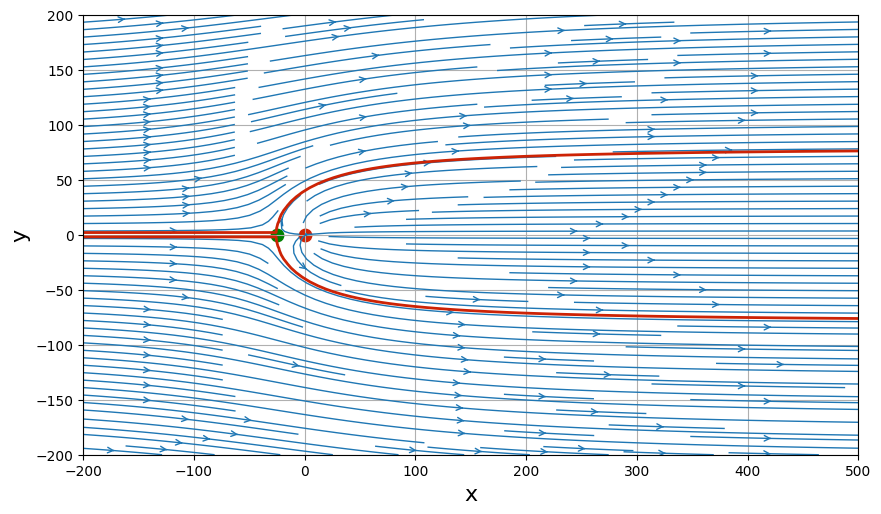

In [412]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# calculate the stagnation point
x_stagnation = x_source - strength_source / (2 * np.pi * u_inf)
y_stagnation = y_source

# display the stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# display the dividing streamline
pyplot.contour(X, Y, psi,
               levels=[-strength_source / 2, strength_source / 2],
               colors='#CD2305', linewidths=2, linestyles='solid');

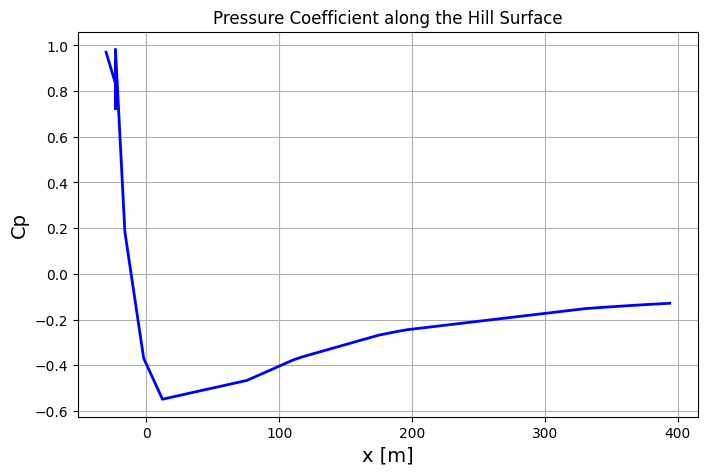

In [413]:
# Define the psi level representing the hill surface (from the dividing streamline contour level)
psi_hill_level = -strength_source / 2

# Create a mask for points along the hill surface (dividing streamline)
epsilon = 10.0  # Tolerance for floating point comparison
hill_surface_mask = np.abs(psi - psi_hill_level) < epsilon

# Extract x coordinates and Cp values along the hill surface
x_surface = X[hill_surface_mask]
cp_surface = cp[hill_surface_mask]

# Sort the values by x for smoother plot
sorted_indices = np.argsort(x_surface)
x_surface_sorted = x_surface[sorted_indices]
cp_surface_sorted = cp_surface[sorted_indices]

# Plot Cp vs x along the hill surface
pyplot.figure(figsize=(8, 5))
pyplot.plot(x_surface_sorted, cp_surface_sorted, color='b', linewidth=2)
pyplot.xlabel('x [m]', fontsize=14)
pyplot.ylabel('Cp', fontsize=14)
pyplot.title('Pressure Coefficient along the Hill Surface')
pyplot.grid(True)
pyplot.show()


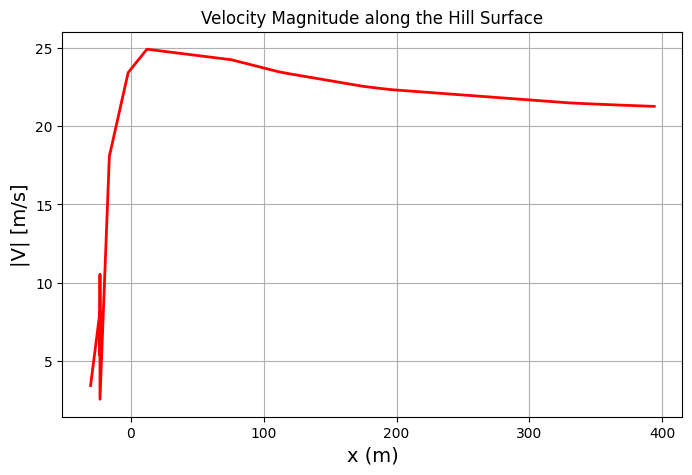

In [414]:
# Define the psi level representing the hill surface (from the dividing streamline contour level)
psi_hill_level = -strength_source / 2
epsilon = 10.0  # Tolerance for floating point comparison

# Create a mask for points that lie along the hill surface
hill_surface_mask = np.abs(psi - psi_hill_level) < epsilon

# Extract x-coordinates and velocity magnitude (V) along the hill surface
x_surface = X[hill_surface_mask]
V_surface = np.sqrt(u[hill_surface_mask]**2 + v[hill_surface_mask]**2)

# Sort by x for smoother plot
sorted_indices = np.argsort(x_surface)
x_surface_sorted = x_surface[sorted_indices]
V_surface_sorted = V_surface[sorted_indices]

# Plot V as a function of x along the hill surface
pyplot.figure(figsize=(8, 5))
pyplot.plot(x_surface_sorted, V_surface_sorted, color='r', linewidth=2)
pyplot.xlabel('x (m)', fontsize=14)
pyplot.ylabel('|V| [m/s]', fontsize=14)
pyplot.title('Velocity Magnitude along the Hill Surface')
pyplot.grid(True)
pyplot.show()
